# Vilar Oscillator
***
**From:** Vilar, José M. G. et al. “Mechanisms of noise-resistance in genetic oscillators.” PNAS, vol. 99 no. 9, 2002, pp. 5988-5992., doi.org/10.1073/pnas.092133899.
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../../')))

In [2]:
import gillespy2

***
## Build the Vilar Oscillator Model
***
Model must include rates, species, and reactions

In [3]:
def build_vilar_oscillator(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="VilarOscillator")
    
    # Set System Volume
    model.volume = 1

    # Define Variables (GillesPy2.Species)
    Da = gillespy2.Species(name="Da", initial_value=1, mode="discrete")
    Da_prime = gillespy2.Species(name="Da_prime", initial_value=0, mode="discrete")
    Ma = gillespy2.Species(name="Ma", initial_value=0, mode="discrete")
    Dr = gillespy2.Species(name="Dr", initial_value=1, mode="discrete")
    Dr_prime = gillespy2.Species(name="Dr_prime", initial_value=0, mode="discrete")
    Mr = gillespy2.Species(name="Mr", initial_value=0, mode="discrete")
    C = gillespy2.Species(name="C", initial_value=0, mode="discrete")
    A = gillespy2.Species(name="A", initial_value=0, mode="discrete")
    R = gillespy2.Species(name="R", initial_value=0, mode="discrete")

    # Add Variables to Model
    model.add_species([Da, Da_prime, Ma, Dr, Dr_prime, Mr, C, A, R])

    # Define Parameters
    alphaA = gillespy2.Parameter(name="alphaA", expression=50)
    alphaA_prime = gillespy2.Parameter(name="alphaA_prime", expression=500)
    alphaR = gillespy2.Parameter(name="alphaR", expression=0.01)
    alphaR_prime = gillespy2.Parameter(name="alphaR_prime", expression=50)
    betaA = gillespy2.Parameter(name="betaA", expression=50)
    betaR = gillespy2.Parameter(name="betaR", expression=5)
    deltaMA = gillespy2.Parameter(name="deltaMA", expression=10)
    deltaMR = gillespy2.Parameter(name="deltaMR", expression=0.5)
    deltaA = gillespy2.Parameter(name="deltaA", expression=1)
    deltaR = gillespy2.Parameter(name="deltaR", expression=0.2)
    gammaA = gillespy2.Parameter(name="gammaA", expression=1)
    gammaR = gillespy2.Parameter(name="gammaR", expression=1)
    gammaC = gillespy2.Parameter(name="gammaC", expression=2)
    thetaA = gillespy2.Parameter(name="thetaA", expression=50)
    thetaR = gillespy2.Parameter(name="thetaR", expression=100)

    # Add Parameters to Model
    model.add_parameter([
        alphaA, alphaA_prime, alphaR, alphaR_prime, betaA, betaR, deltaMA,
        deltaMR, deltaA, deltaR, gammaA, gammaR, gammaC, thetaA, thetaR
    ])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1", reactants={'A': 1, 'R': 1}, products={'C': 1}, rate="gammaC")
    r2 = gillespy2.Reaction(name="r2", reactants={'A': 1}, products={}, rate="deltaA")
    r3 = gillespy2.Reaction(name="r3", reactants={'C': 1}, products={'R': 1}, rate="deltaA")
    r4 = gillespy2.Reaction(name="r4", reactants={'R': 1}, products={}, rate="deltaR")
    r5 = gillespy2.Reaction(name="r5", reactants={'A': 1, 'Da': 1}, products={'Da_prime': 1}, rate="gammaA")
    r6 = gillespy2.Reaction(name="r6", reactants={'Da_prime': 1}, products={'A': 1, 'Da': 1}, rate="thetaA")
    r7 = gillespy2.Reaction(name="r7", reactants={'Da': 1}, products={'Da': 1, 'Ma': 1}, rate="alphaA")
    r8 = gillespy2.Reaction(
        name="r8", reactants={'Da_prime': 1}, products={'Da_prime': 1, 'Ma': 1}, rate="alphaA_prime"
    )
    r9 = gillespy2.Reaction(name="r9", reactants={'Ma': 1}, products={}, rate="deltaMA")
    r10 = gillespy2.Reaction(name="r10", reactants={'Ma': 1}, products={'A': 1, 'Ma': 1}, rate="betaA")
    r11 = gillespy2.Reaction(name="r11", reactants={'A': 1, 'Dr': 1}, products={'Dr_prime': 1}, rate="gammaR")
    r12 = gillespy2.Reaction(name="r12", reactants={'Dr_prime': 1}, products={'A': 1, 'Dr': 1}, rate="thetaR")
    r13 = gillespy2.Reaction(name="r13", reactants={'Dr': 1}, products={'Dr': 1, 'Mr': 1}, rate="alphaR")
    r14 = gillespy2.Reaction(
        name="r14", reactants={'Dr_prime': 1}, products={'Dr_prime': 1, 'Mr': 1}, rate="alphaR_prime"
    )
    r15 = gillespy2.Reaction(name="r15", reactants={'Mr': 1}, products={}, rate="deltaMR")
    r16 = gillespy2.Reaction(name="r16", reactants={'Mr': 1}, products={'Mr': 1, 'R': 1}, rate="betaR")

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=200, num_points=201)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = build_vilar_oscillator()

***
## Run the Simulations
***
Run the model by calling the run function on the model and select algorithm via 'algorithm' keyword argument.
### ODE Simulation

In [5]:
ode_results = model.run(algorithm="ODE")

### SSA Simulation

In [6]:
ssa_results = model.run(algorithm="SSA")

### Tau Leaping Simulation

In [7]:
tau_results = model.run(algorithm="Tau-Leaping")

### Tau Hybrid Simulation

In [8]:
hybrid_results = model.run(algorithm="Tau-Hybrid")

***
## Visualizations
***

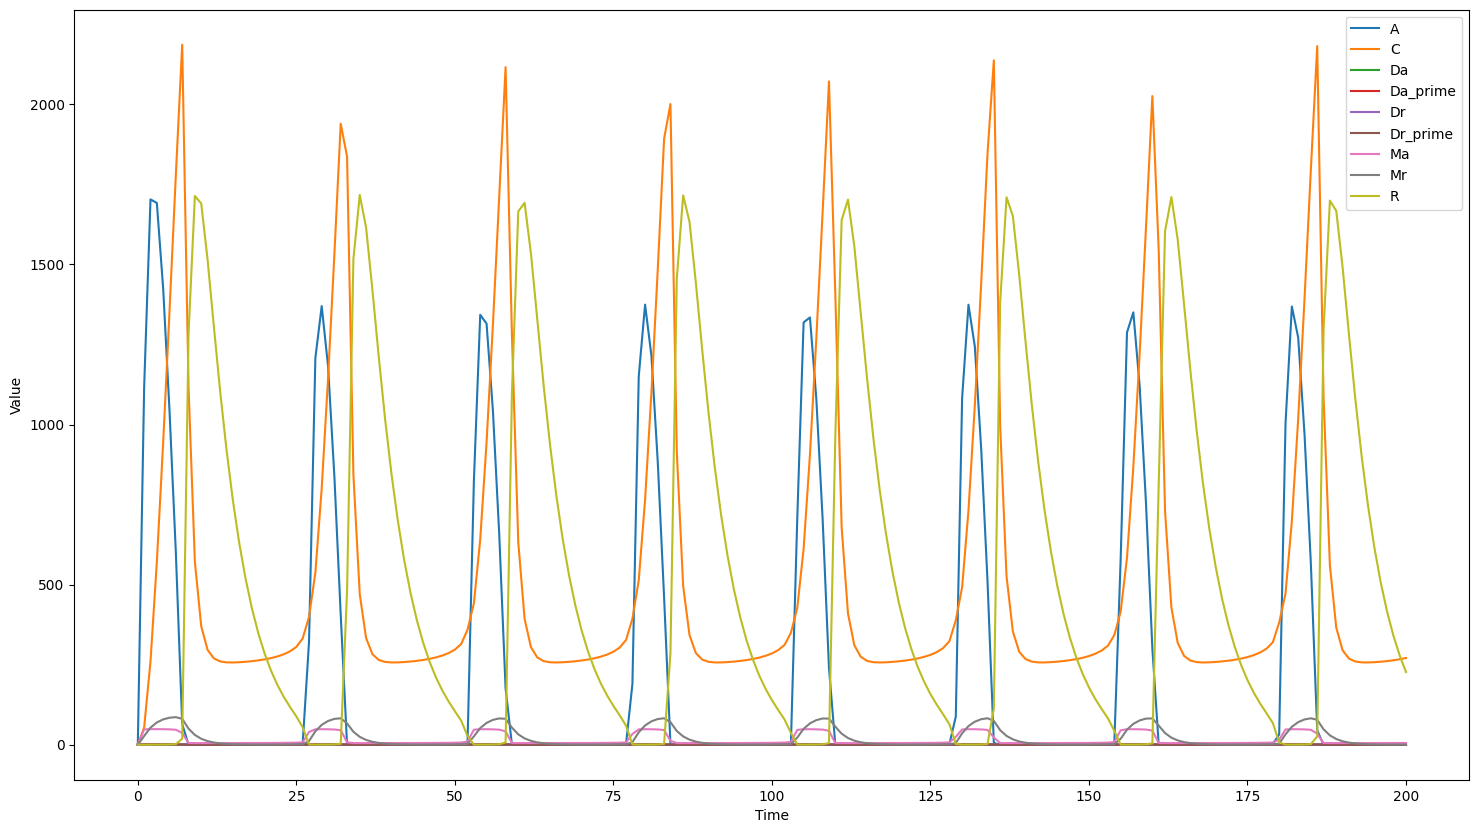

In [9]:
ode_results.plot()

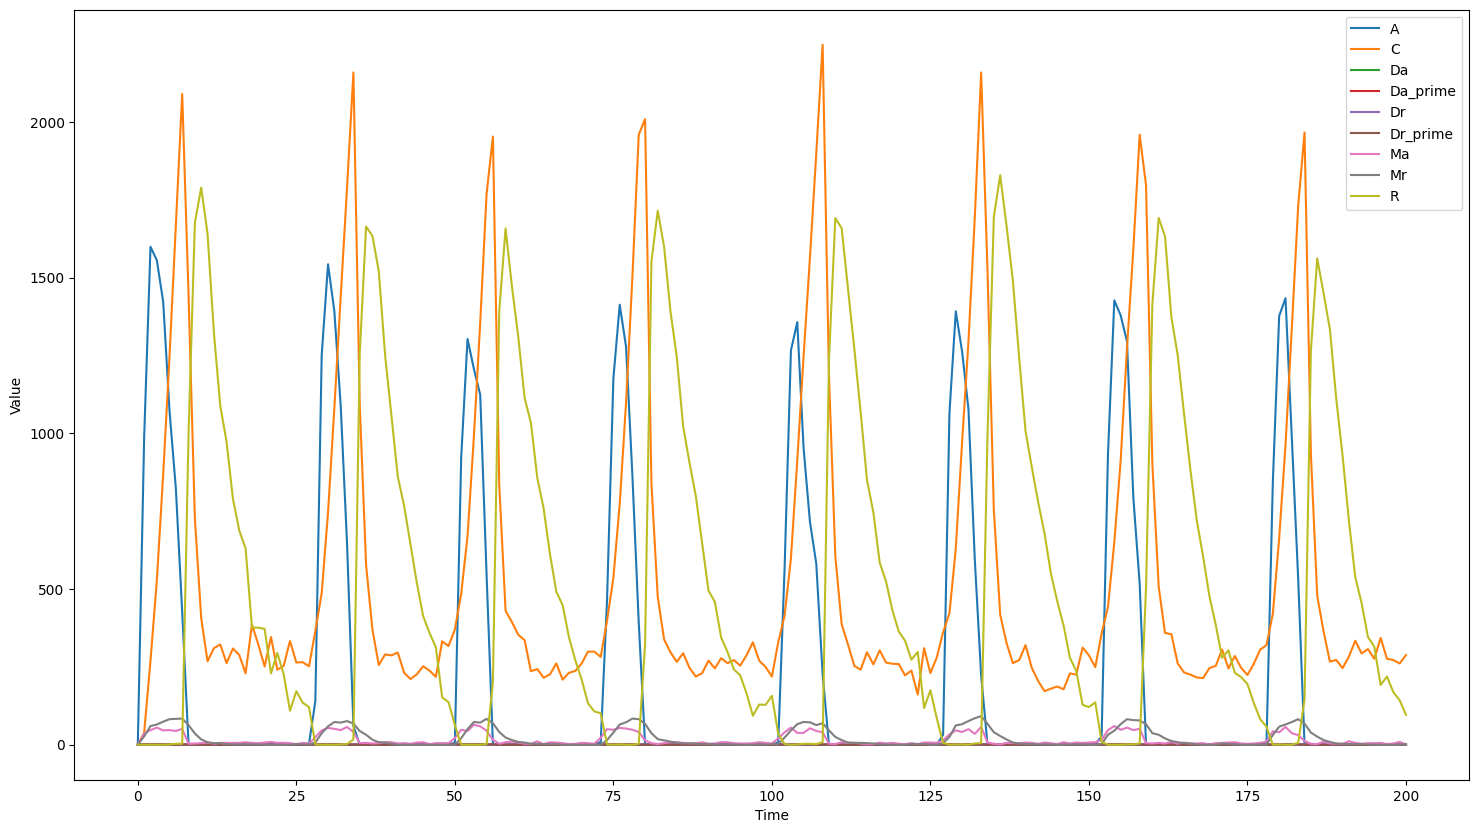

In [10]:
ssa_results.plot()

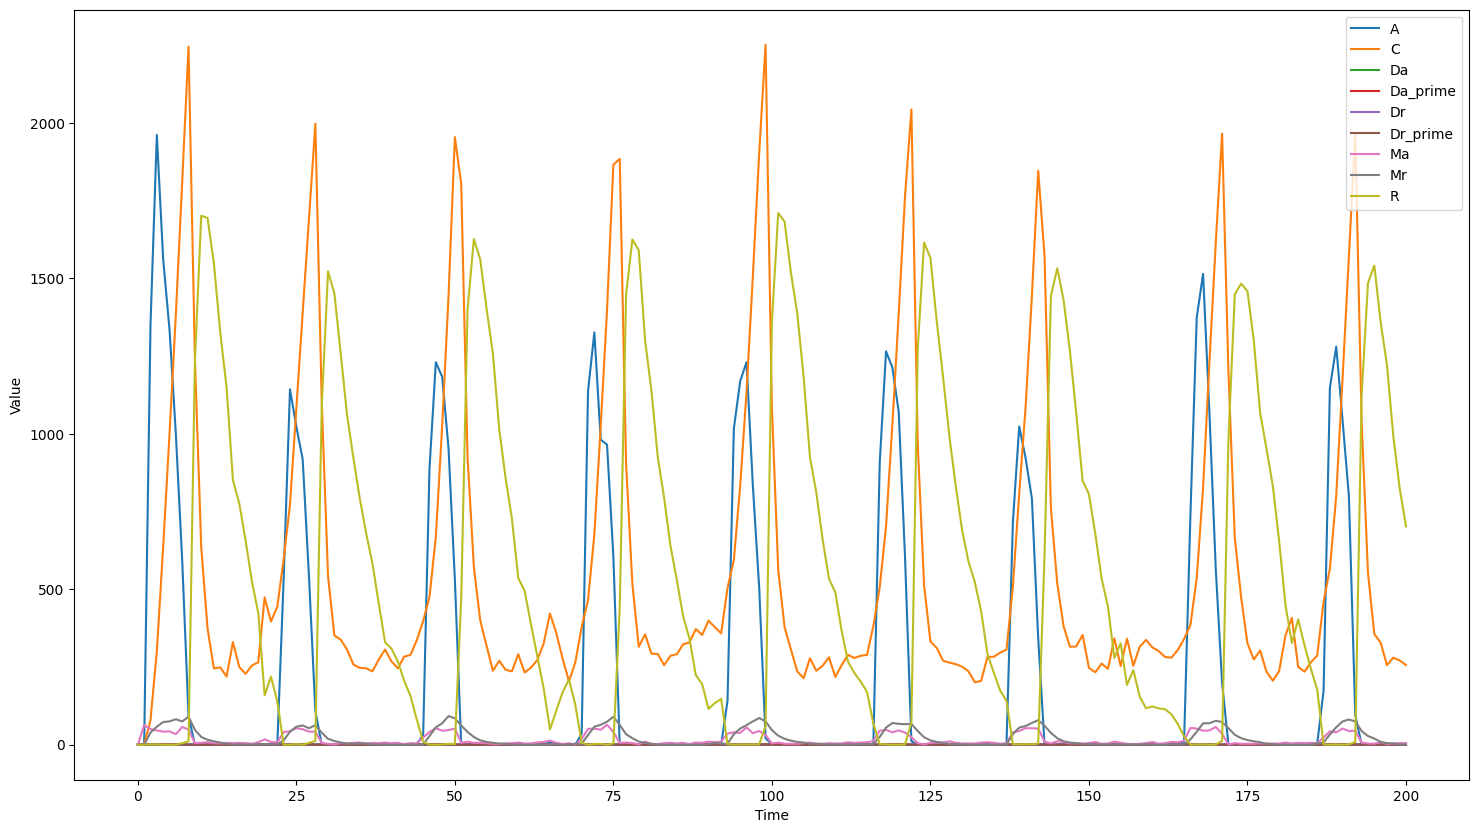

In [11]:
tau_results.plot()

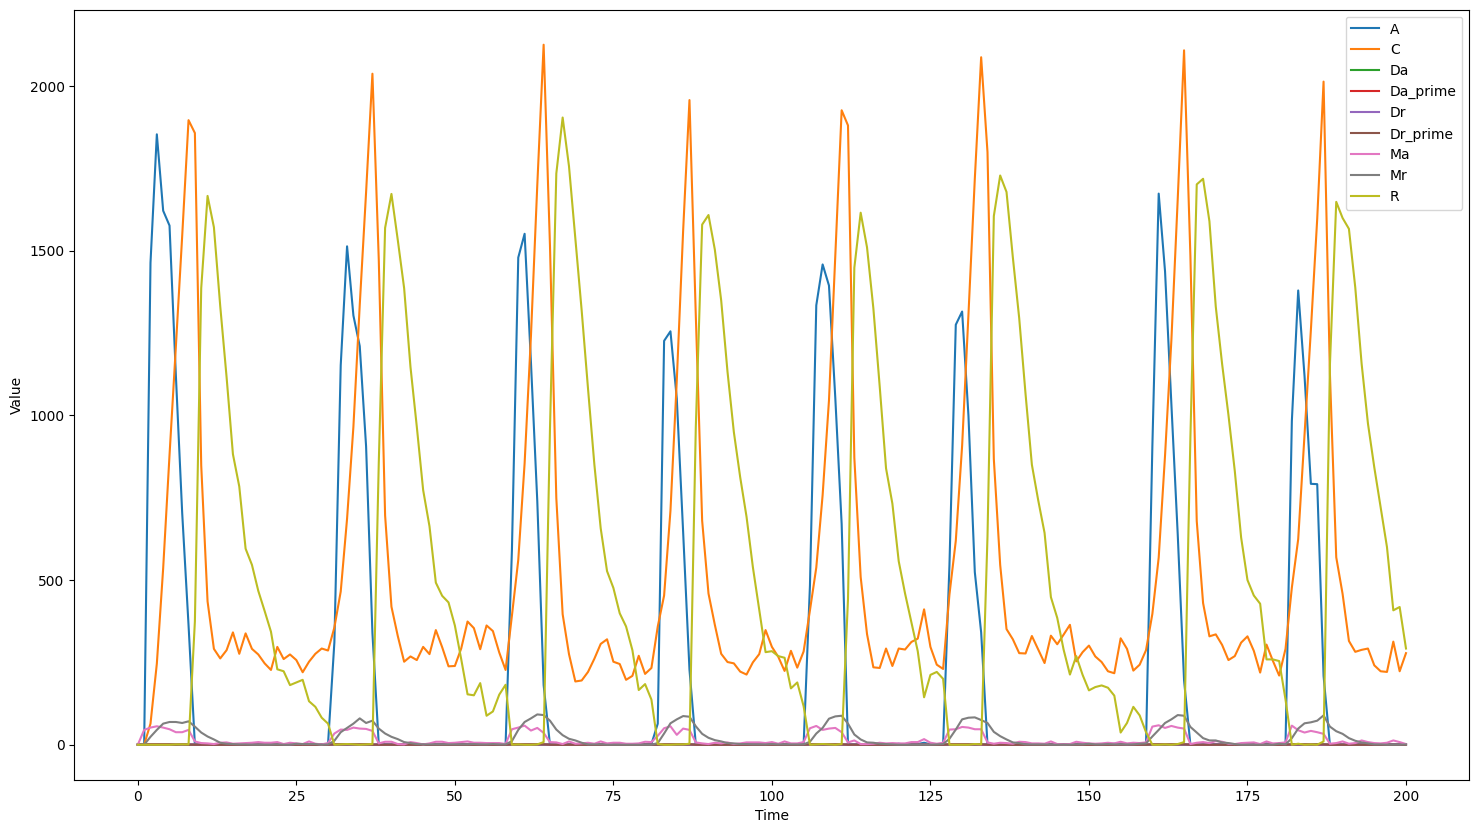

In [12]:
hybrid_results.plot()